<a href="https://colab.research.google.com/github/bastiansosa/data-manipulation/blob/main/Trabajo_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import statsmodels.formula.api as smf

analisis exploratorio para indicar si hay alguna variable para descartar,,, si se podria hacer una regresion y con que datos y si existen datos atipicos

In [ ]:
data = pd.read_csv("HousePrices-DS22.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   house_sqft           120 non-null    int64  
 1   num_of_bedrooms      120 non-null    int64  
 2   num_of_bathrooms     120 non-null    float64
 3   year_built           120 non-null    int64  
 4   tax_assessed_value   120 non-null    int64  
 5   last_sold_price      120 non-null    int64  
 6   rate_per_sqfoot      120 non-null    int64  
 7   city                 120 non-null    object 
 8   home_type            120 non-null    object 
 9   school_rating_1to10  45 non-null     float64
dtypes: float64(2), int64(6), object(2)
memory usage: 9.5+ KB


In [ ]:
df.describe()

,house_sqft,num_of_bedrooms,num_of_bathrooms,year_built,tax_assessed_value,last_sold_price,rate_per_sqfoot,school_rating_1to10
count,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000,45.000000
mean,2373.116667,4.050000,3.020833,2001.991667,3.993667e+05,294614.475000,126.558333,7.933333
std,648.229796,0.591963,0.507903,8.940039,8.890630e+05,71392.526129,22.687795,1.136182
min,1770.000000,3.000000,2.000000,1990.000000,1.950000e+05,196358.000000,89.000000,6.000000
25%,1985.000000,4.000000,2.500000,1992.000000,2.300000e+05,230759.750000,112.000000,7.000000
50%,2090.000000,4.000000,3.000000,2002.000000,3.000000e+05,306384.500000,119.000000,9.000000
75%,2750.000000,4.000000,3.500000,2012.000000,3.300000e+05,333083.250000,153.000000,9.000000
max,3900.000000,5.000000,4.000000,2016.000000,9.100000e+06,450842.000000,161.000000,9.000000


In [ ]:
df

,house_sqft,num_of_bedrooms,num_of_bathrooms,year_built,tax_assessed_value,last_sold_price,rate_per_sqfoot,city,home_type,school_rating_1to10
0,1770,3,2.0,1990,195000,196358,111,atlanta,apartment,6.0
1,1770,3,2.0,1990,195000,197715,112,atlanta,apartment,6.0
2,1770,3,2.0,1990,195000,197816,112,atlanta,apartment,6.0
3,1772,3,2.0,1990,200000,198011,112,atlanta,apartment,6.0
4,1850,3,2.5,1990,200000,200530,108,atlanta,townhome,7.0
...,...,...,...,...,...,...,...,...,...,...
115,2925,5,3.0,2016,440000,445040,152,atlanta,single_family,NaN
116,2925,5,3.0,2016,445000,447022,153,atlanta,single_family,NaN
117,2925,5,3.0,2016,445000,448260,153,atlanta,single_family,NaN
118,2925,5,3.0,2016,445000,449066,154,atlanta,single_family,NaN


In [ ]:
df["school_rating_1to10"].isnull().sum() #75 datos nulos de la columna 

75

In [ ]:
df["city"].unique() # todas las casas estan ubicadas en atlanta,,
                    # por lo que tenerlas en la data no sirve de nada

array(['atlanta'], dtype=object)

In [ ]:
df["num_of_bathrooms"].unique() # observacion: saber que hacer con esta columna

array([2. , 2.5, 3. , 3.5, 4. ])

In [ ]:
#df[df["num_of_bathrooms"]==2.5] # son 61
df[df["num_of_bathrooms"]==3.5] # son 18
# 79 filas con datos float 

In [ ]:
df["home_type"] = df["home_type"].replace({'apartment':1, 'townhome':2, 'single_family':3})

In [ ]:
df = df.drop(["school_rating_1to10","city"], axis=1) # elimino las columna

(1990.0, 2020.0)

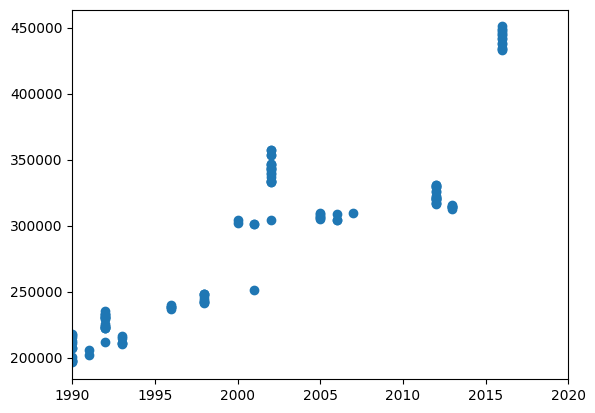

In [ ]:
plt.scatter(df["year_built"], df["last_sold_price"]) 
plt.xlim(1990,2020)

(array([20., 27.,  4.,  0., 31., 21.,  4.,  0.,  0., 13.]),
 array([196358. , 221806.4, 247254.8, 272703.2, 298151.6, 323600. ,
        349048.4, 374496.8, 399945.2, 425393.6, 450842. ]),
 <BarContainer object of 10 artists>)

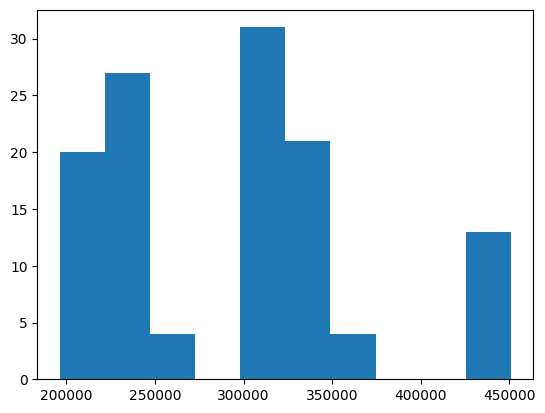

In [ ]:
plt.hist(df["last_sold_price"])

In [ ]:
df.corr()

,house_sqft,num_of_bedrooms,num_of_bathrooms,year_built,tax_assessed_value,last_sold_price,rate_per_sqfoot,home_type,price_pred
house_sqft,1.000000,0.808505,0.699737,0.322361,0.041543,0.646680,-0.392838,0.743831,0.646709
num_of_bedrooms,0.808505,1.000000,0.653325,0.360529,0.099408,0.574384,-0.263013,0.667123,0.574362
num_of_bathrooms,0.699737,0.653325,1.000000,0.420144,0.036923,0.522383,-0.097280,0.439498,0.521910
year_built,0.322361,0.360529,0.420144,1.000000,0.222568,0.878272,0.709274,0.430377,0.878289
tax_assessed_value,0.041543,0.099408,0.036923,0.222568,1.000000,0.187594,0.184602,0.040061,0.188457
last_sold_price,0.646680,0.574384,0.522383,0.878272,0.187594,1.000000,0.430921,0.654916,0.999956
rate_per_sqfoot,-0.392838,-0.263013,-0.097280,0.709274,0.184602,0.430921,1.000000,-0.132617,0.430940
home_type,0.743831,0.667123,0.439498,0.430377,0.040061,0.654916,-0.132617,1.000000,0.655188
price_pred,0.646709,0.574362,0.521910,0.878289,0.188457,0.999956,0.430940,0.655188,1.000000


In [ ]:
lm = smf.ols(formula="last_sold_price~rate_per_sqfoot*house_sqft",data=df).fit() #Conclusion: este modelo pareciera que da buenos resultados
                                                                                 # sin embargo, alguno de sus estadisticos dicen lo contrario
                                                                                 # por ejemplos, sus pvalues, aunque el modelo tiene un r^2 del 
                                                                                 # 99%. Su valor de f es mucho mas grande en comparacion al otro
                                                                                 # modelo 

In [ ]:
lm.pvalues

Intercept                      4.379530e-01
rate_per_sqfoot                4.362621e-01
house_sqft                     4.517182e-01
rate_per_sqfoot:house_sqft    2.639942e-146
dtype: float64

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        last_sold_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.427e+05
Date:                Sun, 02 Apr 2023   Prob (F-statistic):          3.34e-235
Time:                        22:36:27   Log-Likelihood:                -950.13
No. Observations:                 120   AIC:                             1908.
Df Residuals:                     116   BIC:                             1919.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -1219.0954   1566.275     -0.778      0.438   -4321.300    1883.110
rate_per_sqfoot               10.7368     13.744      0.781      0.436     -16.484      37.958
house_sqft                     0.4298      0.569      0.755      0.452      -0.698       1.557
rate_per_sqfoot:house_sqft     0.9961      0.005    189.133      0.000       0.986       1.007
==============================================================================
Omnibus:                        4.013   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                3.126
Skew:                          -0.270   Prob(JB):                        0.210
Kurtosis:                       2.422   Cond. No.                     7.70e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

last_sold_price = 10.736807 * rate_per_sqfoot + 0.429764 * house_sqft -1219.095356


In [ ]:
df["price_pred"] = lm.predict(pd.DataFrame(df[["rate_per_sqfoot","house_sqft"]]))
df.head(10)

,house_sqft,num_of_bedrooms,num_of_bathrooms,year_built,tax_assessed_value,last_sold_price,rate_per_sqfoot,home_type,price_pred
0,1770,3,2.0,1990,195000,196358,111,1,196434.092214
1,1770,3,2.0,1990,195000,197715,112,1,198207.898571
2,1770,3,2.0,1990,195000,197816,112,1,198207.898571
3,1772,3,2.0,1990,200000,198011,112,1,198431.881024
4,1850,3,2.5,1990,200000,200530,108,2,199753.224256
5,1850,3,2.5,1991,200000,201805,109,2,201606.717372
6,1850,3,2.5,1991,205000,206175,111,2,205313.703603
7,1850,3,2.5,1990,205000,207027,112,2,207167.196719
8,1850,3,2.5,1990,205000,207121,112,2,207167.196719
9,1850,3,2.5,1993,205000,210519,114,2,210874.182950


In [ ]:
SSD = sum((df["last_sold_price"]-df["price_pred"])**2)
RSE = np.sqrt(SSD/(len(df)-2-1))
sales_m = np.mean(df["last_sold_price"])
error = RSE / sales_m
RSE

672.8279505236269

In [ ]:
lm2 = smf.ols(formula="last_sold_price~year_built*house_sqft",data=df).fit() #Conclusiones: A pesar que este modelo tenga un r^2 alto
lm2.rsquared,lm.pvalues                                                      # hay otros estadisticos que indican que no es tan buen modelo.
                                                                             # El valor de RSE(Error estandar residual) es muy elevado en 
                                                                             # comparacion al primer modelo. De la misma manera para los
                                                                             # pvalues, en este caso sus valores son muy grandes. Tiene un
                                                                             # error de 4%. Ademas, los graficos indican que los valores que 
                                                                             # predice en comparacion a los originales son bastante dispersos 
                                                                             # juzgue ud mismo los valores predecidos 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        last_sold_price   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1468.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           4.70e-92
Time:                        23:47:41   Log-Likelihood:                -1291.1
No. Observations:                 120   AIC:                             2590.
Df Residuals:                     116   BIC:                             2601.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.165e+07    1.5e+06      7.768      0.000    8.68e+06    1.46e+07
year_built            -5726.7094    749.225     -7.644      0.000   -7210.644   -4242.775
house_sqft            -1.057e+04    670.340    -15.768      0.000   -1.19e+04   -9241.954
year_built:house_sqft     5.3014      0.335     15.834      0.000       4.638       5.964
==============================================================================
Omnibus:                       56.589   Durbin-Watson:                   0.610
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.125
Skew:                           1.791   Prob(JB):                     3.11e-37
Kurtosis:                       7.560   Cond. No.                     6.99e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.99e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
pred2 = lm2.predict(pd.DataFrame(df[["year_built","house_sqft"]]))
df["pred2"] = pred2
df

,house_sqft,num_of_bedrooms,num_of_bathrooms,year_built,tax_assessed_value,last_sold_price,rate_per_sqfoot,home_type,price_pred,pred2
0,1770,3,2.0,1990,195000,196358,111,1,196434.092214,214606.577310
1,1770,3,2.0,1990,195000,197715,112,1,198207.898571,214606.577310
2,1770,3,2.0,1990,195000,197816,112,1,198207.898571,214606.577310
3,1772,3,2.0,1990,200000,198011,112,1,198431.881024,214566.767016
4,1850,3,2.5,1990,200000,200530,108,2,199753.224256,213014.165538
...,...,...,...,...,...,...,...,...,...,...
115,2925,5,3.0,2016,440000,445040,152,3,444529.123328,445891.451000
116,2925,5,3.0,2016,445000,447022,153,3,447453.407271,445891.451000
117,2925,5,3.0,2016,445000,448260,153,3,447453.407271,445891.451000
118,2925,5,3.0,2016,445000,449066,154,3,450377.691215,445891.451000


In [ ]:
SSD = sum((df["last_sold_price"]-pred2)**2)
RSE = np.sqrt(SSD/(len(df)-2-1))
sales_m = np.mean(df["last_sold_price"])
error = RSE / sales_m*100
error

3.9150774326510507

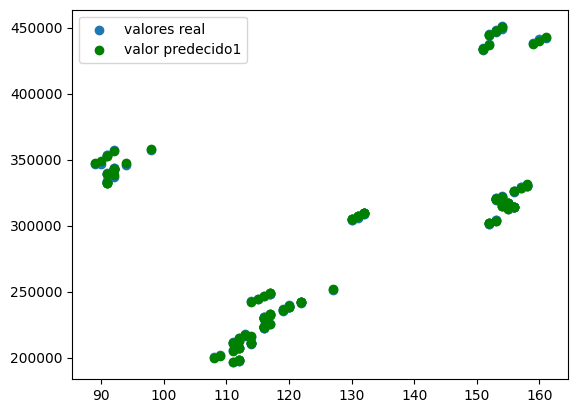

In [ ]:
%matplotlib inline
plt.scatter(df["rate_per_sqfoot"]	,df["last_sold_price"], label="valores real")
plt.scatter(df["rate_per_sqfoot"],df["price_pred"], color="g", label="valor predecido1")
#plt.scatter(df["rate_per_sqfoot"],df["pred2"], label="valor predecido2")
plt.legend()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f21221775e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2122552b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f21222a2340>],
 'medians': [<matplotlib.lines.Line2D at 0x7f21220aeac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f21220ae700>],
 'means': []}

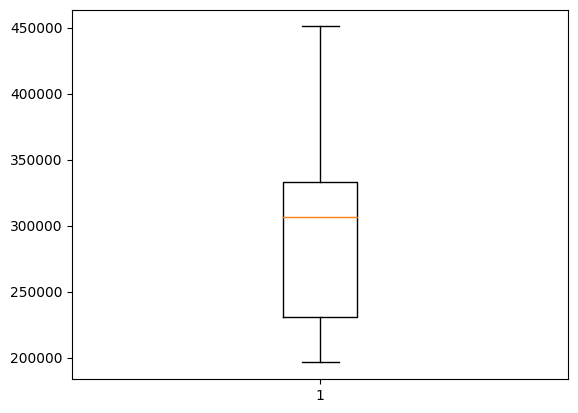

In [ ]:
plt.boxplot(df["last_sold_price"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f21222fb760>,
 'caps': [<matplotlib.lines.Line2D at 0x7f21224b2550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f21224216d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f21222119d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f212218a190>],
 'means': []}

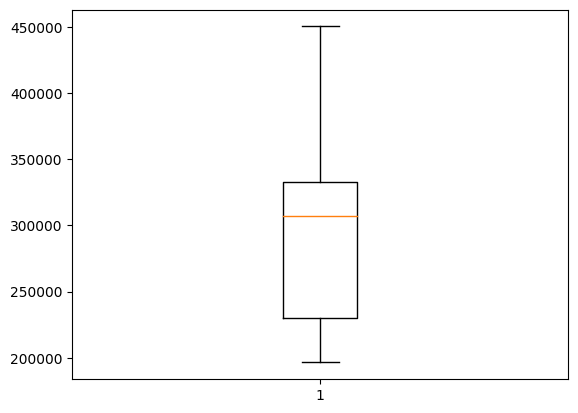

In [ ]:
plt.boxplot(df["price_pred"])

In [ ]:
df.groupby("last_sold_price").mean().head(50)

Hare que la libreria RFE me indique que variable utilizar para el modelo y vere que tal.

In [ ]:
feature_cols = ["rate_per_sqfoot", "house_sqft", "year_built","home_type"] #columnas para la prediccion

In [ ]:
x = df[feature_cols]
y = df["last_sold_price"] #variable a hacer predecida

In [ ]:
estimator = SVR(kernel="linear")
selector = RFE(estimator,n_features_to_select=2,step=1) # 2->porque quiero dos variables para mi modelo 
selector = selector.fit(x,y) 

In [ ]:
selector.support_

array([ True, False,  True, False])

In [ ]:
df.corr()

In [ ]:
lm3 = smf.ols(formula="last_sold_price~rate_per_sqfoot*year_built",data=df).fit()

In [ ]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        last_sold_price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     214.2
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           4.00e-47
Time:                        22:45:14   Log-Likelihood:                -1398.2
No. Observations:                 120   AIC:                             2804.
Df Residuals:                     116   BIC:                             2816.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -1.043e+07   7.08e+06     -1.472      0.144   -2.45e+07     3.6e+06
rate_per_sqfoot            -5.968e+04   5.45e+04     -1.095      0.276   -1.68e+05    4.83e+04
year_built                  5436.0191   3534.791      1.538      0.127   -1565.081    1.24e+04
rate_per_sqfoot:year_built    29.1520     27.175      1.073      0.286     -24.671      82.976
==============================================================================
Omnibus:                        5.866   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                6.039
Skew:                           0.536   Prob(JB):                       0.0488
Kurtosis:                       2.761   Cond. No.                     7.07e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.07e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
prediccion = lm3.predict(pd.DataFrame(df[["rate_per_sqfoot","year_built"]]))
prediccion # la prediccion no es tan buena o precisa como el primer modelo

0      206994.079296
1      205325.013281
2      205325.013281
3      205325.013281
4      212001.277340
           ...      
115    395107.677042
116    394196.563716
117    394196.563716
118    393285.450390
119    393285.450390
Length: 120, dtype: float64

En conclusion, el modelo que mejor predice los valores de las casas es el primero, sin embargo, estadisticos como los pvalues asociados al modelo son muy grandes, por lo q, los datos son probables con una hipotesis nula verdadera, es decir, que los valores acompañados a los coef de la ecuacion es muy probable que sean 0. Es muy interesante este modelo porque a pesar que tenga p valores alto su r^2 tambien lo es y es capaz de predecir valores muy cerca de los originales con un error muy minimo segun lo que nos dice el modelo. El valor de los errores estandar residual que tiene este modelo es el menor en comparacion a los otros  

In [ ]:
n = data.shape[0] # Número de datos
input_variable_name = ['year_built']
output_variable_name = ['last_sold_price']
X = data[input_variable_name].values
Y = data[output_variable_name].values


In [ ]:
Xc = np.c_[np.ones(shape=(n,1)), data[input_variable_name].values]
theta_theoretical = np.linalg.inv(Xc.T@Xc) @ (Xc.T@Y)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, Y)

theta_sklearn  = np.array([model.intercept_] + [temp for temp in model.coef_]).reshape(-1,1)
theta_sklearn

array([[-1.37465973e+07],
       [ 7.01362148e+03]])

In [ ]:
text1 = 'La ecuación final de regresión usando sklearn es:'
text2 = 'y_{%s} = %2.3f'%(output_variable_name[0], theta_sklearn[0])
for i in range(1,len(theta_theoretical)):
  text2 += ' + %2.3f X_{%s}'%(theta_sklearn[i],input_variable_name[i-1])
print(text1,'\n',text2)

La ecuación final de regresión usando sklearn es: 
 y_{last_sold_price} = -13746597.286 + 7013.621 X_{year_built}


In [ ]:
Xtest = np.linspace(Xc[:,1].min(), Xc[:,1].max(), 1001).reshape(-1,1)
Xtest = np.concatenate((np.ones(shape=(Xtest.shape[0],1)), Xtest),axis=1)

In [ ]:
Ytest = Xtest @ theta_theoretical
Ytest

array([[210509.46405195],
       [210691.8182105 ],
       [210874.17236905],
       ...,
       [392498.91428549],
       [392681.26844404],
       [392863.62260259]])

In [ ]:
import plotly.graph_objects as go
text_title = '$ \text{' + text1 + ' } \\' + text2 + '$'
fig = go.Figure()
fig.add_trace(go.Scatter(y=Y[:,0], x=Xc[:,1],mode='markers', name='Datos originales'))
fig.add_trace(go.Scatter(y=Ytest[:,0], x=Xtest[:,1],mode='lines', name=r'Tendencia del modelo.<br>Datos test'))
fig.update_layout(title=f"{text_title!r}", xaxis_title=input_variable_name[0], yaxis_title=output_variable_name[0])

# CON POLINOMIO 

In [ ]:
n = data.shape[0] # Número de datos
input_variable_name = ['year_built']
output_variable_name = ['last_sold_price']
X = data[input_variable_name].values
Y = data[output_variable_name].values

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly = PolynomialFeatures(2)
X_ext = poly.fit_transform(X)

In [ ]:
#model = LinearRegression(fit_intercept=False).fit(X_ext, Y)
model = make_pipeline(PolynomialFeatures(4), LinearRegression(fit_intercept=False)).fit(X_ext, Y)

In [ ]:
ns = 400
Xtest_ext = np.c_[np.ones(shape=(ns,1)),
              np.linspace(X_ext[:,0].min(), X_ext[:,0].max(), ns).reshape(-1,1),
              np.linspace(X_ext[:,1].min(), X_ext[:,1].max(), ns).reshape(-1,1)]
Ytest_ext = model.predict(Xtest_ext)

In [ ]:
Ytest

array([[210509.46405195],
       [210691.8182105 ],
       [210874.17236905],
       ...,
       [392498.91428549],
       [392681.26844404],
       [392863.62260259]])

In [ ]:
text_title = '$ \text{' + text1 + ' } \\' + text2 + '$'
fig = go.Figure()
fig.add_trace(go.Scatter3d(z=Y[:,0], x=X_ext[:,1],y=X_ext[:,2],mode='markers', name='Datos originales'))
fig.add_trace(go.Scatter3d(z=Ytest_ext[:,0], x=Xtest_ext[:,1], y=Xtest_ext[:,2],line=dict(width=200),mode='lines', name=r'Tendencia del modelo.<br>Datos test'))
fig.update_layout(title=f"{text_title!r}", xaxis_title=input_variable_name[0], yaxis_title=output_variable_name[0])